In [1]:
from torchvision import datasets
import torch
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

# Getting dataset

In [2]:
data_folder = "../Chapter3/dataset/"
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images, tr_targets = fmnist.data, fmnist.targets

C:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Showing an image

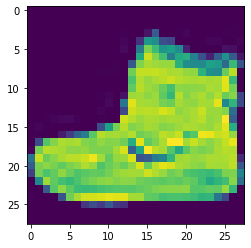

In [3]:
plt.imshow(tr_images[0]);

# Affine transformations

### Scaling

In [4]:
def tensor_to_numpy(tensor):
    return tensor.cpu().detach().numpy()

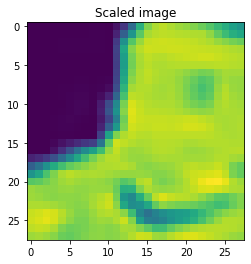

In [5]:
aug = iaa.Affine(scale=2)
plt.imshow(aug.augment_image(tensor_to_numpy(tr_images[0])))
plt.title("Scaled image");

### Translation

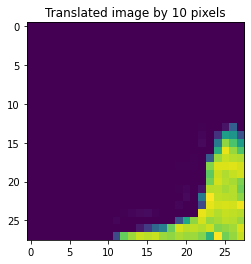

In [6]:
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(tensor_to_numpy(tr_images[0])))
plt.title("Translated image by 10 pixels");

**Translation happens across both the x and y axes.**

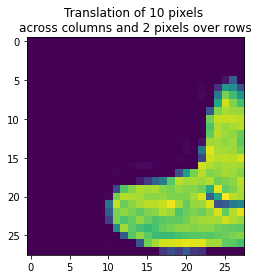

In [7]:
aug = iaa.Affine(translate_px={'x': 10, 'y': 2})
plt.imshow(aug.augment_image(tensor_to_numpy(tr_images[0])))
plt.title("Translation of 10 pixels \nacross columns and 2 pixels over rows");

### Scaling, Translation, Rotation, and Shearing without pixel loss

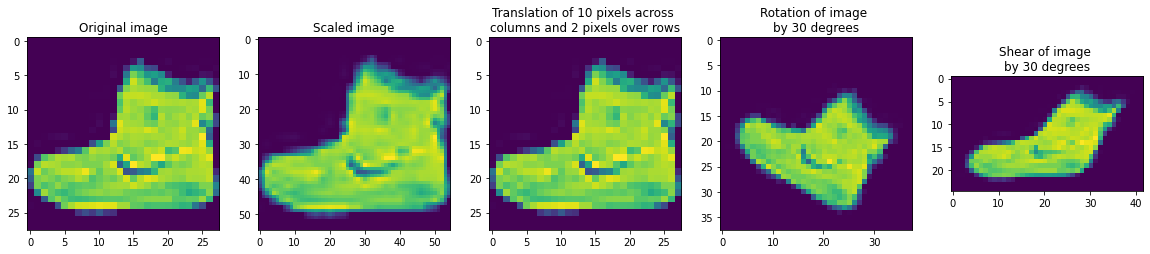

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

# Original Image
axes[0].imshow(tr_images[0])
axes[0].set(title="Original image")

# Scaled image
aug = iaa.Affine(scale=2, fit_output=True)
axes[1].imshow(aug.augment_image(tensor_to_numpy(tr_images[0])))
axes[1].set(title="Scaled image")

# Translation
aug = iaa.Affine(translate_px={"x": 10, "y": 2}, fit_output=True)
axes[2].imshow(aug.augment_image(tensor_to_numpy(tr_images[0])))
axes[2].set(title='Translation of 10 pixels across \ncolumns and 2 pixels over rows')

# Rotation
aug = iaa.Affine(rotate=30, fit_output=True)
axes[3].imshow(aug.augment_image(tensor_to_numpy(tr_images[0])))
axes[3].set(title="Rotation of image \nby 30 degrees")

# Shear
aug = iaa.Affine(shear=30, fit_output=True)
axes[4].imshow(aug.augment_image(tensor_to_numpy(tr_images[0])))
axes[4].set(title="Shear of image \nby 30 degrees");

### Filling new pixels after change in dimensionality

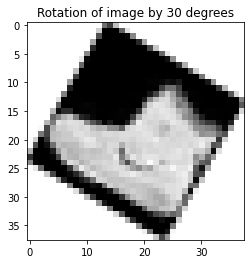

In [9]:
aug = iaa.Affine(rotate=30, fit_output=True, cval=255)
plt.imshow(aug.augment_image(tensor_to_numpy(tr_images[0])), cmap='gray')
plt.title("Rotation of image by 30 degrees");

### Modes of filling newly created pixels

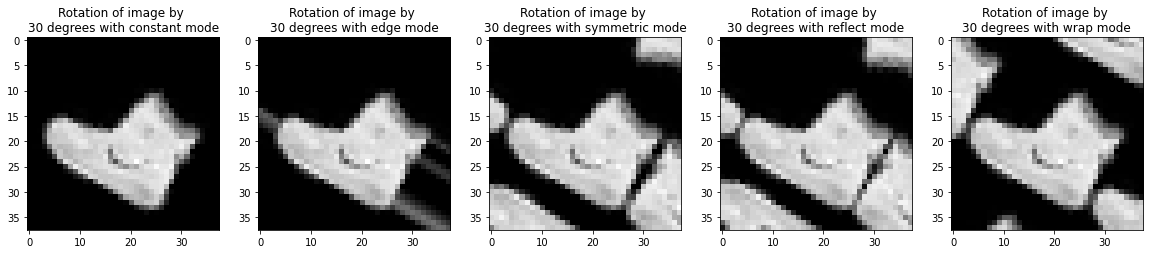

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

modes = ['constant', 'edge', 'symmetric', 'reflect', 'wrap']
for idx, mode in enumerate(modes):
    aug = iaa.Affine(rotate=30, fit_output=True, mode=mode)
    axes[idx].imshow(aug.augment_image(tensor_to_numpy(tr_images[0])), cmap='gray')
    axes[idx].set(title=f"Rotation of image by \n30 degrees with {mode} mode")

- `constant`: Pads with a constant value.
- `edge`: Pads with the edge values of the array.
- `symmetric`: Pads with the reflection of the vector mirrored along the edge of the array.
- `reflect`: Pads with the reflection of the vector mirrored on the first and last values of the vector along each axis.
- `wrap`: Pads with the wrap of the vector along the axis.

### Rotate within a range

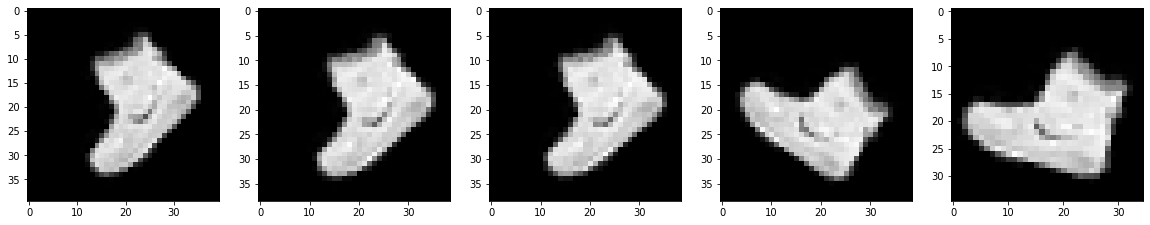

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

for i in range(5):
    aug = iaa.Affine(rotate=(-45, 45), fit_output=True, mode='constant')
    axes[i].imshow(aug.augment_image(tensor_to_numpy(tr_images[0])), cmap='gray');

The same operation can be applied to transformation or shear.

# Changing the brightness

### Multiply

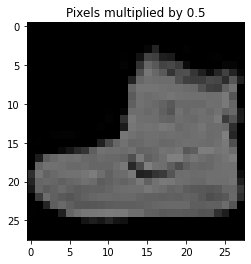

In [16]:
aug = iaa.Multiply(0.5)
plt.imshow(aug.augment_image(tensor_to_numpy(tr_images[0])), cmap='gray', vmin=0, vmax=255)
plt.title("Pixels multiplied by 0.5");

### LinearContrast
Adjusts each pixel value based on the following formula:
$$new\ pixel\ value = 127+\alpha \times (old\ pixel\ value - 127)$$

In the preceding equation, when $\alpha = 1$, then $new\ pixel\ value = old\ pixel\ value$. But when it is lower than 1, high pixel values are reduced and low pixel values are increased.

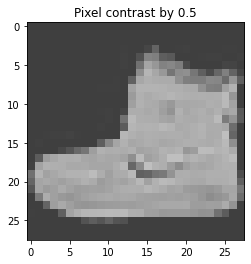

In [18]:
aug = iaa.LinearContrast(0.5)
plt.imshow(aug.augment_image(tensor_to_numpy(tr_images[0])), cmap='gray', vmin=0, vmax=255)
plt.title("Pixel contrast by 0.5");

### GaussianBlur

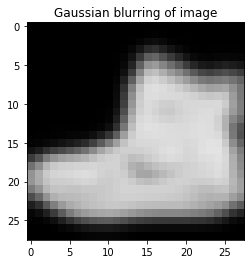

In [19]:
aug = iaa.GaussianBlur(sigma=1)
plt.imshow(aug.augment_image(tensor_to_numpy(tr_images[0])), cmap='gray', vmin=0, vmax=255)
plt.title("Gaussian blurring of image");

# Adding noise

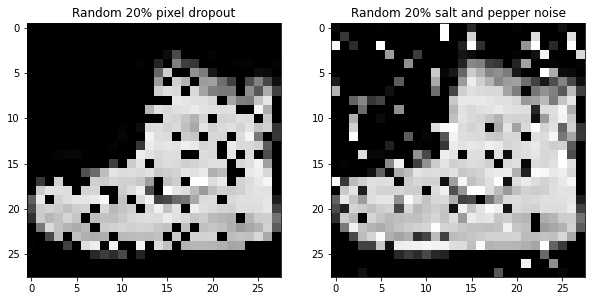

In [24]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

# Dropout
aug = iaa.Dropout(p=0.2)
ax0.imshow(aug.augment_image(tensor_to_numpy(tr_images[0])), cmap='gray', vmin=0, vmax=255)
ax0.set(title="Random 20% pixel dropout")

# Salt And Pepper
aug = iaa.SaltAndPepper(0.2)
ax1.imshow(aug.augment_image(tensor_to_numpy(tr_images[0])), cmap='gray', vmin=0, vmax=255)
ax1.set(title="Random 20% salt and pepper noise");

`SaltAndPepper` **adds random white-ish and black-ish pixels to our image**

# Perform of a sequence of augmentations

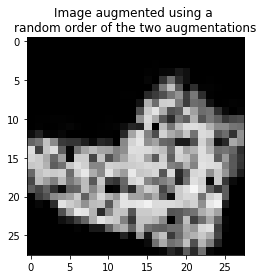

In [28]:
seq = iaa.Sequential([iaa.Dropout(p=0.2), iaa.Affine(rotate=(-30, 30))], random_order=True)

plt.imshow(seq.augment_image(tensor_to_numpy(tr_images[0])), cmap='gray', vmin=0, vmax=255)
plt.title("Image augmented using a \nrandom order of the two augmentations");